# Scenario 1: Analyzing Hospital Data for Quality Control

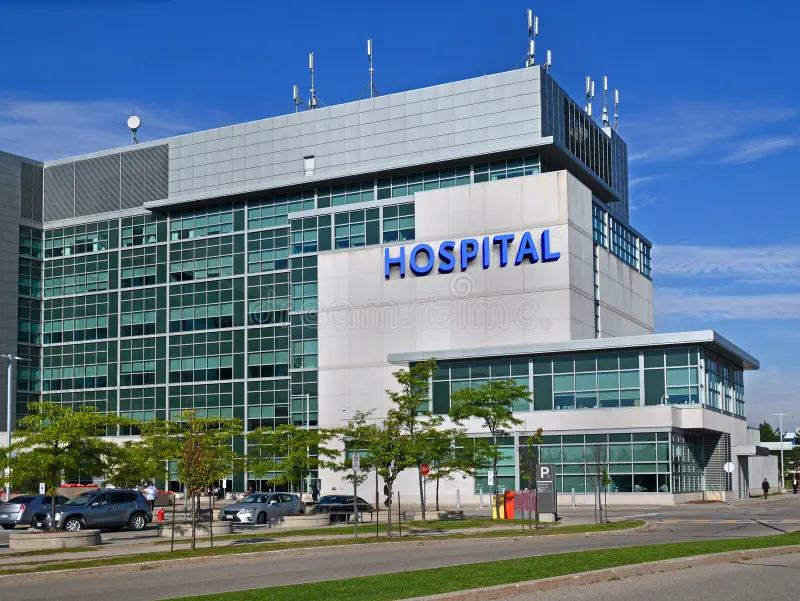

The Quality Control Department at General Hospital is conducting an analysis to ensure the accuracy and consistency of their patient data. They've compiled a dataset containing information about patients, including financial transactions, demographic details, medical records, and contact information. The goal is to clean this data before performing any in-depth analysis to improve the hospital's service quality.

As part of the quality control team, your task is to clean the dataset by addressing various issues such as inconsistent formatting, incorrect data types, and redundant entries. This will involve converting string values to integers, categorizing numeric data, filtering data within specific ranges, identifying duplicates, finding inconsistent categories, and cleaning text data.

In [4]:
# Imports:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [5]:
hospital_data = pd.read_csv("C:/Users/miche/Downloads/dataset-week 12/hospital_data.csv")
hospital_data.head()

,transaction_amount,patient_id,age,blood_type,contact_number
0,$380.79,1574,19,A,+1-555-0121
1,$951.21,1863,70,B+,+1-555-0157
2,$734.67,1742,61,A,+1-555-0157
3,$602.67,1240,49,O,+1-555-0185
4,$164.46,1563,87,O,+1-555-0148


**Initial Analysis**

In [7]:
hospital_data.isna().sum()

transaction_amount    0
patient_id            0
age                   0
blood_type            0
contact_number        0
dtype: int64

In [8]:
hospital_data.duplicated().sum()

1

In [9]:
hospital_data['blood_type'].unique()

array(['A', 'B+', 'O', 'AB', 'A+', 'B'], dtype=object)

**Clean Data**

In [11]:
# Convert string values to integers
encoder = LabelEncoder()

hospital_data['transaction_amount'] = hospital_data['transaction_amount'].str.strip('$')
hospital_data['transaction_amount'] = hospital_data['transaction_amount'].astype(float)
hospital_data['contact_number'] = hospital_data['contact_number'].str.replace('+1', '')
hospital_data['contact_number'] = hospital_data['contact_number'].str.replace('-', '')
hospital_data['blood_type'] = hospital_data['blood_type'].str.strip()
hospital_data['blood_type'] = encoder.fit_transform(hospital_data['blood_type'])
hospital_data.head()

,transaction_amount,patient_id,age,blood_type,contact_number
0,380.79,1574,19,0,5550121
1,951.21,1863,70,4,5550157
2,734.67,1742,61,0,5550157
3,602.67,1240,49,5,5550185
4,164.46,1563,87,5,5550148


In [12]:
# Categorize numeric data
group_names = ['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly']
hospital_data['age_group'] = pd.qcut(hospital_data['age'], q = 5, labels = group_names)
hospital_data.head()

,transaction_amount,patient_id,age,blood_type,contact_number,age_group
0,380.79,1574,19,0,5550121,Child
1,951.21,1863,70,4,5550157,Senior
2,734.67,1742,61,0,5550157,Senior
3,602.67,1240,49,5,5550185,Adult
4,164.46,1563,87,5,5550148,Elderly


In [13]:
# Filter data within specific ranges
hospital_data[hospital_data['transaction_amount'] > 650].head(10)

,transaction_amount,patient_id,age,blood_type,contact_number,age_group
1,951.21,1863,70,4,5550157,Senior
2,734.67,1742,61,0,5550157,Senior
7,867.51,1733,72,5,5550169,Senior
9,710.99,1406,34,5,5550153,Child
11,970.21,1748,41,5,5550196,Young Adult
12,834.12,1654,86,0,5550107,Elderly
25,787.32,1556,37,2,5550115,Young Adult
33,949.40,1339,74,3,5550157,Senior
34,965.98,1797,67,0,5550154,Senior
35,810.31,1957,40,3,5550189,Young Adult


In [14]:
# Identify duplicates
print(hospital_data.duplicated().sum())
hospital_data = hospital_data.drop_duplicates()

1


In [15]:
# Find inconsistent categories
print(hospital_data['blood_type'].unique())
print(hospital_data['age_group'].unique())

[0 4 5 2 1 3]
['Child', 'Senior', 'Adult', 'Elderly', 'Young Adult']
Categories (5, object): ['Child' < 'Young Adult' < 'Adult' < 'Senior' < 'Elderly']


In [16]:
# Clean text data
hospital_data['age_group'] = hospital_data['age_group'].str.lower()
hospital_data.head(10)

,transaction_amount,patient_id,age,blood_type,contact_number,age_group
0,380.79,1574,19,0,5550121,child
1,951.21,1863,70,4,5550157,senior
2,734.67,1742,61,0,5550157,senior
3,602.67,1240,49,5,5550185,adult
4,164.46,1563,87,5,5550148,elderly
5,164.43,1095,49,5,5550151,adult
6,67.50,1899,85,2,5550141,elderly
7,867.51,1733,72,5,5550169,senior
8,605.10,1484,73,2,5550114,senior
9,710.99,1406,34,5,5550153,child


In [17]:
# Explain in your own words how the code worked for this scenario

**Explanation:**

Before starting to clean this dataset, I first analyzed the data. I check whether there were duplicates, nulls values, if the values in the blood_type column might not be true (like a blood type of Z+). Then I started to clean the data with this new knowledge in mind.
Here are the steps I used to clean the data:
1. Convert string values to integers - the columns transaction_amount, blood_type and contact_number were categorical columns; and while suitable for their given tasks (such as the dollar sign, or the '+1' addition to the phone number), are ultimately redundant and need to be changed to the integer data type for analysis. This is what I did in this part. I removed the qualities that made these column categorical, and then I changed them to integers. I was unable to do this for the blood_type column, so I used a label encoder to transform this column into the data type int.
2. Categorize numeric data - for this step, I added the age_group column to the dataset. I used qcut to create the age ranges that appeared suitable. For example, I made 5 categories, and then qcut used this so that any age under 20 (20/100 -> 1/5 -> 5 categories) would be considered a child, under 40 but over 20 is a young adult, and so on.
3. Filter data within specific ranges - in this step I performed a simple analysis on the data to make sure that it was working properly. For this analysis, I filtered the rows where the amount spent in the transaction_amount column was over 650.
4. Identify duplicates - I did this in the initial analysis phase, so at that point I found that there was only one duplicate. In this step, I found that this still stayed consistent after cleaning the data. To handle this duplicate, I decided to drop that row out of the dataset as it was only one duplicate.
5. Find inconsistent categories - in this step, I looked at the columns that might contain inconsistent values (such as blood_type and whether there might be one more/duplicated value during the encoding). I used the .unique() function to find any inconsistencies in the age_group column as well. After viewing the outputs provided, I did not find any inconsistencies which means that the encoding and .qcut() function worked.
6. Clean text data - in this last step, I cleaned the age_group column by lowering all uppercase letter for easier future analysis.

In conclusion, I clean this dataset by transforming the categorical columns to numerical, added the age_group column for easier future analysis, identified and dropped the duplicate, checked for any inconsistent categories (none of which the columns appeared to have), cleaned the data in the last step, and finally checked whether any changes went through using different methods throughout this process (such as viewing the head of the dataset, .info() is useful for finding out whether the columns were the data types that I believed them to be, and many other built-in functions).

In [19]:
# Here is the markdown again:

# Explanation:

# Before starting to clean this dataset, I first analyzed the data. I check whether there were duplicates, nulls values, if the values in the 
# blood_type column might not be true (like a blood type of Z+). Then I started to clean the data with this new knowledge in mind. 
# Here are the steps I used to clean the data:

# 1. Convert string values to integers - the columns transaction_amount, blood_type and contact_number were categorical columns; 
#      and while suitable for their given tasks (such as the dollar sign, or the '+1' addition to the phone number), are ultimately redundant 
#      and need to be changed to the integer data type for analysis. This is what I did in this part. I removed the qualities that made these 
#      column categorical, and then I changed them to integers. I was unable to do this for the blood_type column, so I used a label encoder to 
#      transform this column into the data type int.
# 2. Categorize numeric data - for this step, I added the age_group column to the dataset. I used qcut to create the age ranges that appeared suitable. 
#      For example, I made 5 categories, and then qcut used this so that any age under 20 (20/100 -> 1/5 -> 5 categories) would be considered a child, 
#      under 40 but over 20 is a young adult, and so on.
# 3. Filter data within specific ranges - in this step I performed a simple analysis on the data to make sure that it was working properly. 
#      For this analysis, I filtered the rows where the amount spent in the transaction_amount column was over 650.
# 4. Identify duplicates - I did this in the initial analysis phase, so at that point I found that there was only one duplicate. In this step, 
#      I found that this still stayed consistent after cleaning the data. To handle this duplicate, I decided to drop that row out of the dataset 
#      as it was only one duplicate.
# 5. Find inconsistent categories - in this step, I looked at the columns that might contain inconsistent values (such as blood_type and whether 
#      there might be one more/duplicated value during the encoding). I used the .unique() function to find any inconsistencies in the age_group column
#      as well. After viewing the outputs provided, I did not find any inconsistencies which means that the encoding and .qcut() function worked.
# 6. Clean text data - in this last step, I cleaned the age_group column by lowering all uppercase letter for easier future analysis.

# In conclusion, I clean this dataset by transforming the categorical columns to numerical, added the age_group column for easier future analysis, 
# identified and dropped the duplicate, checked for any inconsistent categories (none of which the columns appeared to have), cleaned the data in 
# the last step, and finally checked whether any changes went through using different methods throughout this process (such as viewing the head of 
# the dataset, .info() is useful for finding out whether the columns were the data types that I believed them to be, and many other built-in functions).

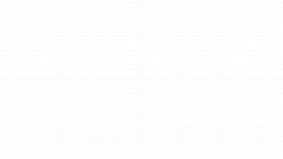

# Scenario 2: Analyzing Employee Data for HR Insights

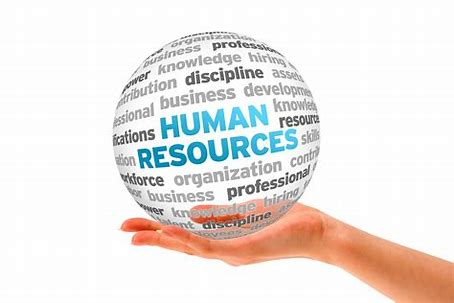

The Human Resources department at a large corporation is conducting an analysis of employee information to optimize workforce management and improve employee satisfaction. They've gathered a dataset containing details about employees' demographics, performance metrics, and work history. However, the dataset is messy and requires cleaning before any meaningful analysis can be performed.

As part of the HR analytics team, your task is to clean the dataset by addressing various issues such as inconsistent formatting, missing values, normalization of numerical data, and encoding categorical features. This will involve converting datetime values, handling missing data with visualization for better insights, normalizing metrics using z-score, and encoding categorical variables for statistical analysis.

In [24]:
# Imports:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [25]:
hr_data = pd.read_csv("C:/Users/miche/Downloads/dataset-week 12/employee_data.csv")
hr_data.head()

,employee_id,name,birthday,salary,department,performance_score,years_of_service,education_level,gender,marital_status,vacation_days
0,1102,Employee_0,1995-07-16,63827,Finance,1,1,Master,Male,Single,5
1,1435,Employee_1,1980-06-10,85820,IT,5,1,Master,Male,Single,27
2,1860,Employee_2,1991-10-07,92623,IT,4,15,High School,Male,Married,1
3,1270,Employee_3,1985-06-04,111734,Finance,5,2,PhD,Female,Divorced,5
4,1106,Employee_4,1982-09-22,105450,Finance,3,16,PhD,Female,Single,17


**Clean Data**

In [27]:
# Remove 'Employee' from name -> make it an interger column
hr_data['name'] = hr_data['name'].str.strip('Employee_').astype('int')

# Remove white spaces and lowercase all categorical data
hr_data['department'] = hr_data['department'].str.strip().str.lower()
hr_data['education_level'] = hr_data['education_level'].str.strip().str.lower()
hr_data['gender'] = hr_data['gender'].str.strip().str.lower()
hr_data['marital_status'] = hr_data['marital_status'].str.strip().str.lower()

# Double check all numeric and categorical data
print(hr_data.info())
hr_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employee_id        100 non-null    int64 
 1   name               100 non-null    int32 
 2   birthday           100 non-null    object
 3   salary             100 non-null    int64 
 4   department         100 non-null    object
 5   performance_score  100 non-null    int64 
 6   years_of_service   100 non-null    int64 
 7   education_level    90 non-null     object
 8   gender             100 non-null    object
 9   marital_status     100 non-null    object
 10  vacation_days      100 non-null    int64 
dtypes: int32(1), int64(5), object(5)
memory usage: 8.3+ KB
None


,employee_id,name,birthday,salary,department,performance_score,years_of_service,education_level,gender,marital_status,vacation_days
0,1102,0,1995-07-16,63827,finance,1,1,master,male,single,5
1,1435,1,1980-06-10,85820,it,5,1,master,male,single,27
2,1860,2,1991-10-07,92623,it,4,15,high school,male,married,1
3,1270,3,1985-06-04,111734,finance,5,2,phd,female,divorced,5
4,1106,4,1982-09-22,105450,finance,3,16,phd,female,single,17


**Address Various Issues:**

In [29]:
# Convert datetime values
hr_data['birthday'] = pd.to_datetime(hr_data['birthday'], infer_datetime_format=True, errors = 'coerce')

C:\Users\miche\AppData\Local\Temp\ipykernel_11472\3770116167.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  hr_data['birthday'] = pd.to_datetime(hr_data['birthday'], infer_datetime_format=True, errors = 'coerce')


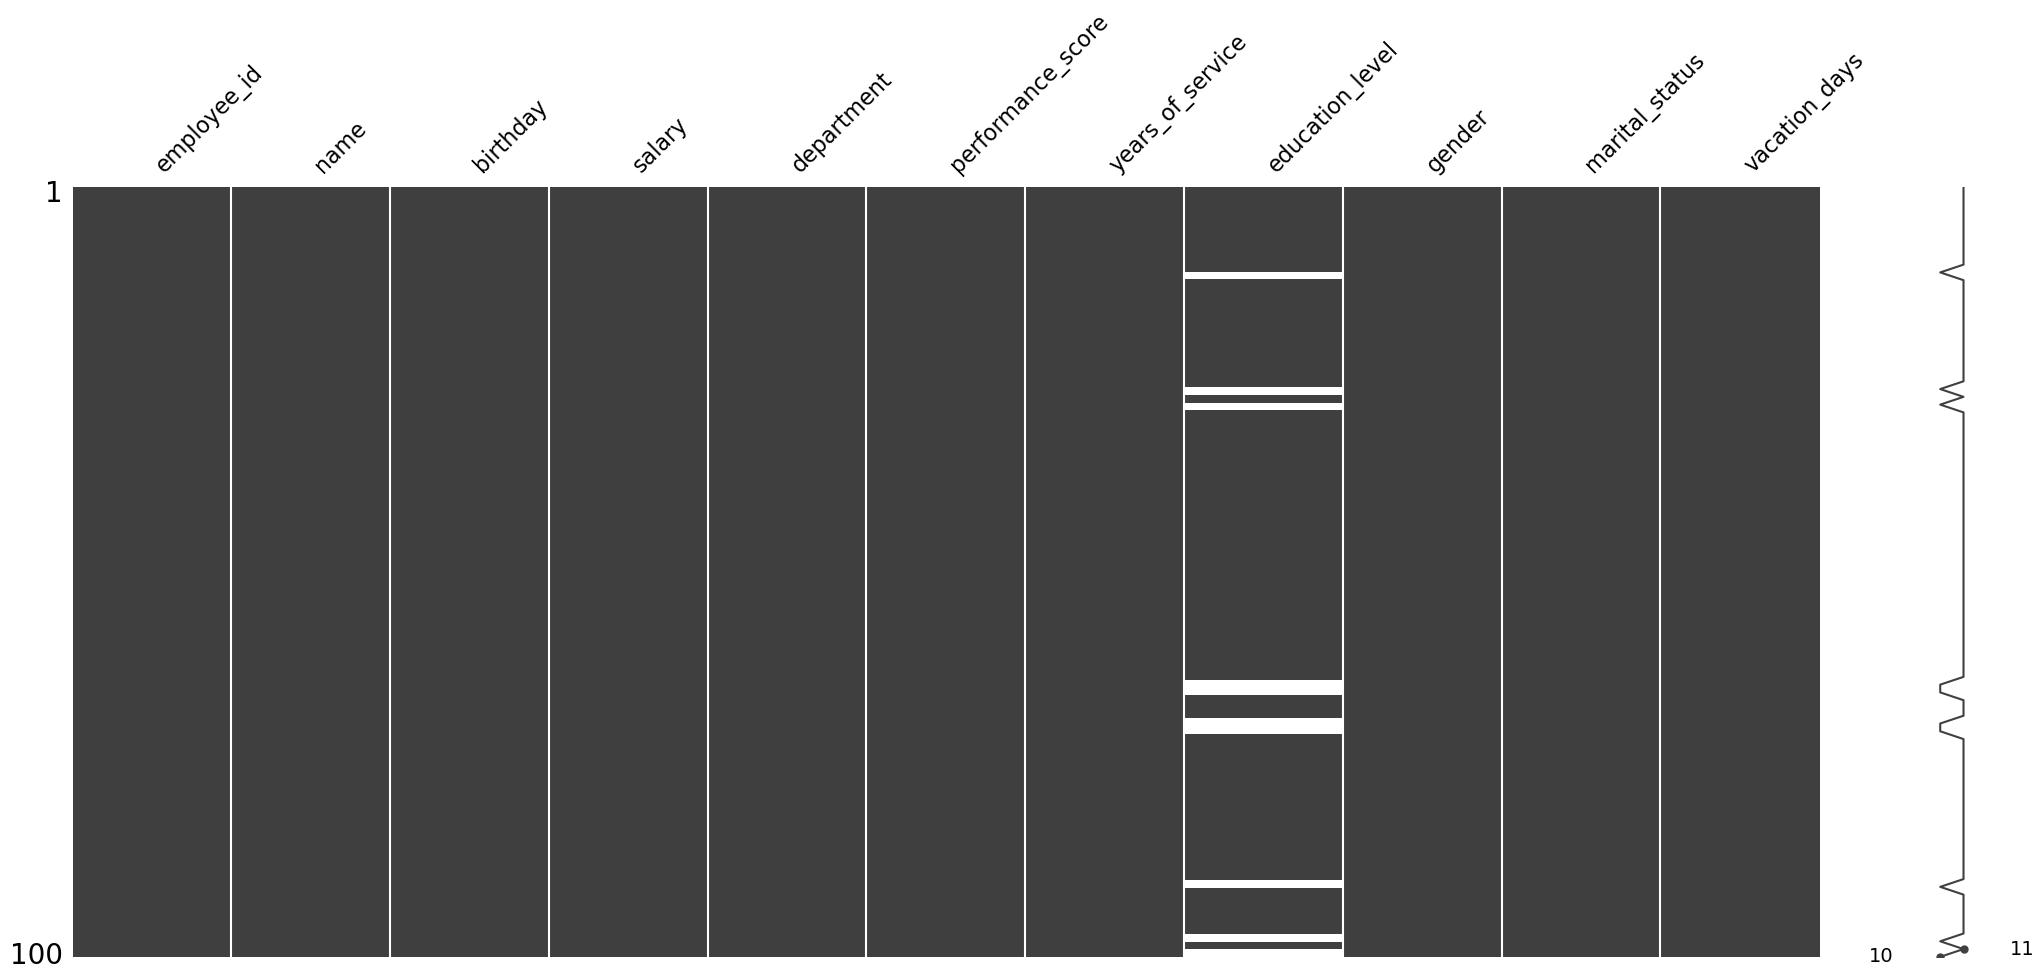

In [30]:
# Handle missing data - with visualization for insights
msno.matrix(hr_data)
plt.show()

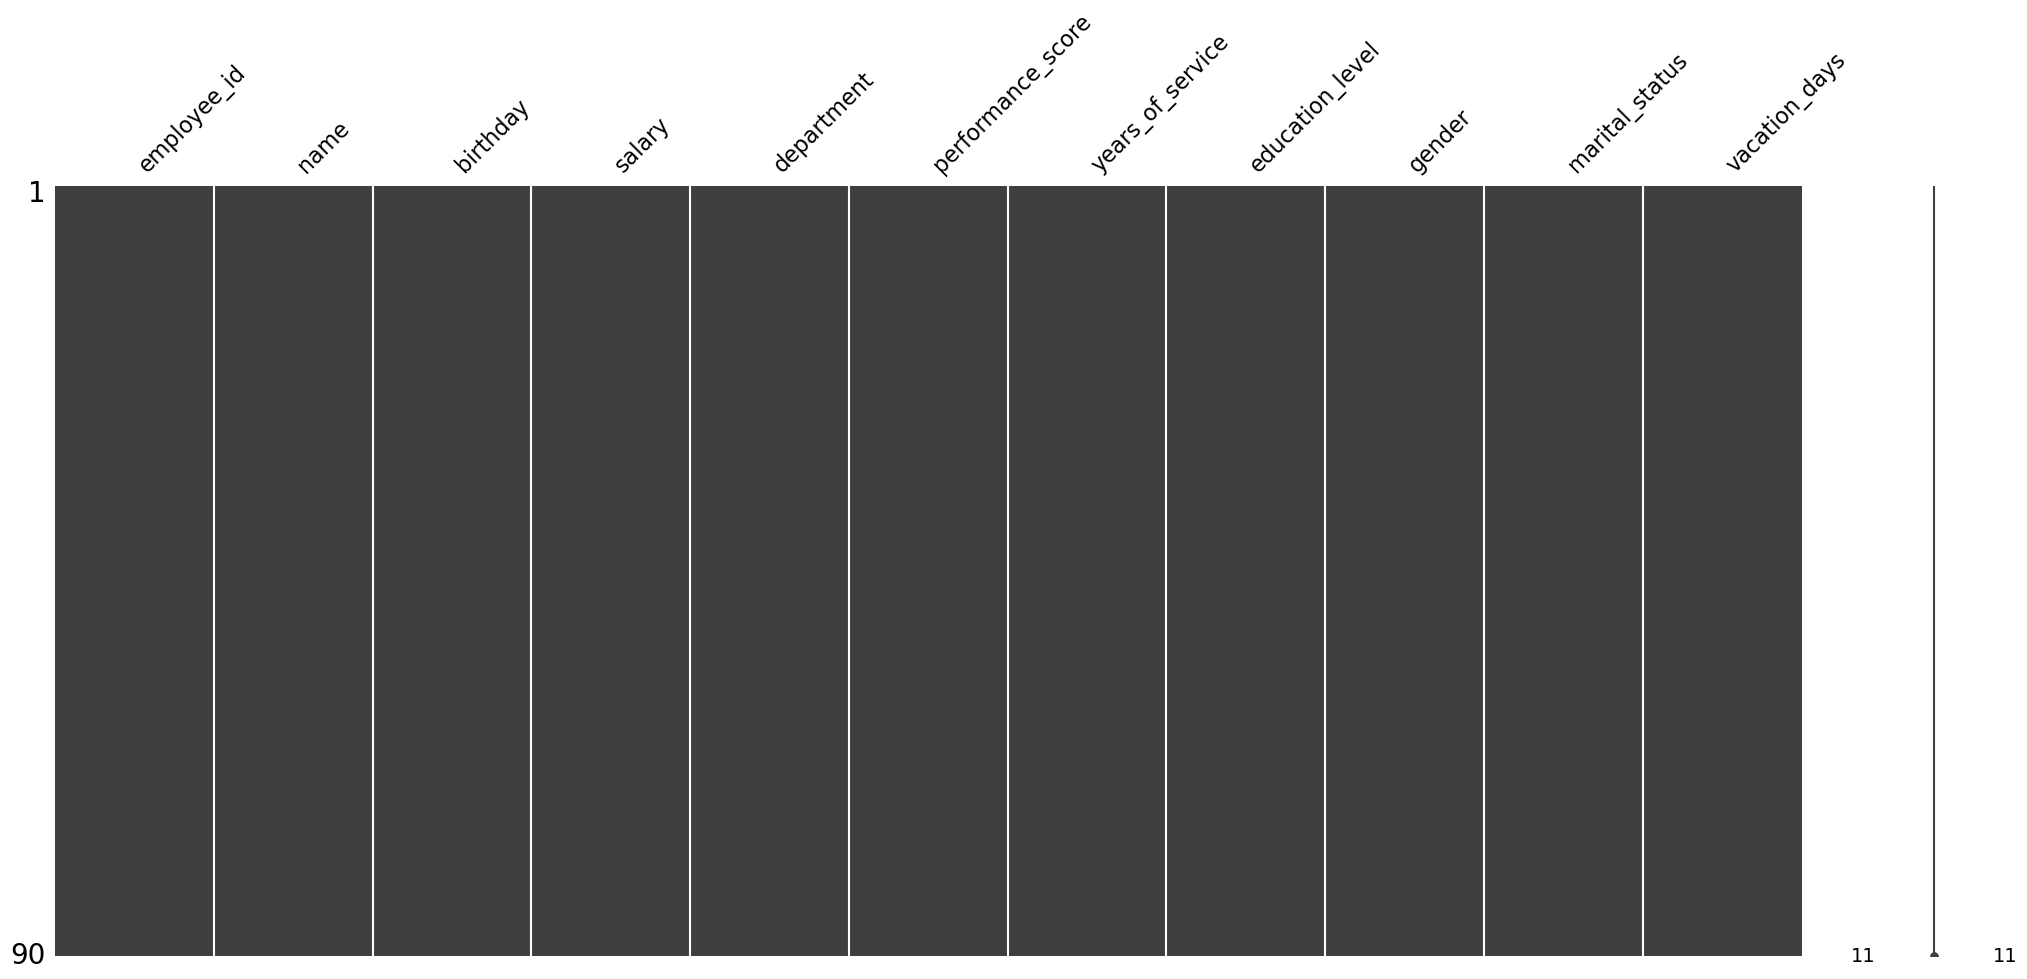

In [31]:
# Deal with missing values
hr_data = hr_data.dropna()
msno.matrix(hr_data)
plt.show()

In [32]:
# Normalize metrics using z-score
zscore_results = pd.DataFrame({
    'Salary': zscore(hr_data['salary']),
    'Score': zscore(hr_data['performance_score']),
    'Years': zscore(hr_data['years_of_service']),
    'Vacation': zscore(hr_data['vacation_days'])
})

zscore_results.head()

,Salary,Score,Years,Vacation
0,-0.465553,-1.434116,-1.493727,-1.154563
1,0.404872,1.418270,-1.493727,1.354806
2,0.674118,0.705173,0.913045,-1.610812
3,1.430481,1.418270,-1.321815,-1.154563
4,1.181777,-0.007923,1.084958,0.214183


In [33]:
hr_data.head()

,employee_id,name,birthday,salary,department,performance_score,years_of_service,education_level,gender,marital_status,vacation_days
0,1102,0,1995-07-16,63827,finance,1,1,master,male,single,5
1,1435,1,1980-06-10,85820,it,5,1,master,male,single,27
2,1860,2,1991-10-07,92623,it,4,15,high school,male,married,1
3,1270,3,1985-06-04,111734,finance,5,2,phd,female,divorced,5
4,1106,4,1982-09-22,105450,finance,3,16,phd,female,single,17


In [34]:
# Encode categorical variable - for statistical analysis
encoder = LabelEncoder()

hr_data['department'] = encoder.fit_transform(hr_data['department'])
hr_data['education_level'] = encoder.fit_transform(hr_data['education_level'])
hr_data['marital_status'] = encoder.fit_transform(hr_data['marital_status'])
hr_data['gender'] = encoder.fit_transform(hr_data['gender'])
hr_data.head()

,employee_id,name,birthday,salary,department,performance_score,years_of_service,education_level,gender,marital_status,vacation_days
0,1102,0,1995-07-16,63827,0,1,1,2,1,2,5
1,1435,1,1980-06-10,85820,2,5,1,2,1,2,27
2,1860,2,1991-10-07,92623,2,4,15,1,1,1,1
3,1270,3,1985-06-04,111734,0,5,2,3,0,0,5
4,1106,4,1982-09-22,105450,0,3,16,3,0,2,17


In [35]:
# Explain in your own words how the code worked for this scenario

**Explanation:**

I first started by cleaning the data. I removed the 'Employee' part of the name column to make it a numerical column for easier analysis, then removed white spaces and lowercase all categorical data, and finally, double checked that all numerical column are actually numerical, and the same for the categorical data type. Then I started addressing the various issues within the dataset using the steps below:
1. Convert datetime values - the age column contains values that appear to be dates, so by converting all these values into the datetime format, this makes it easier for future analysis of this data.
2. Handle missing data - using a matrix, I found that there were null values in the education_level column, so I decided to handle them by removing them entirely from the daatset. Another way I could have handled this, is by finding the mean of this column, and then replacing the null with that value. I decided to go this way as the dataset is fairely large, and there were few null rows.
3. Normalize metrics using z-score - I normalized the metrics/column values that were available (numeric data types) and stored these values in a dataframe. I could have added this onto the original dataset, or entirely replaced those columns with the new normalized data, but this is specific to a business that would like to store their data that way, so I decided to keep it in it's own dataframe that could be called upon for future use.
4. Encode categorical variables - in this final step, I encoded the columns containing categorical data for easier future use. These columns included the department, education_level, gender, and marital_status columns. With numerical data, it is much easier to analyze and find patterns in a dataset, than it is with categorical data types.

In conclusion, I first started by cleaning the dataset by making any columns I could a numerical data type and cleaning up the categorical columns from inconsistencies (like white spaces and uppercase letters). Then, I started to address the different issues in the dataset by first converting the birthday column values into the datetime format, then handled missing data in the education_level column by removing the rows with null values, normalized the necessary columns using z-score, and finally encoded the categorical variables. I also took different measures to make sure that all changes were implemented, such as, displaying the head of the dataset(s), the matrix for missing/null values recognition, .info() for checking whether all columns contained the data types meant for them, and other metrics were also available for this (like .describe()).

In [37]:
# Here is the markdown again:

# Explanation:

# I first started by cleaning the data. I removed the 'Employee' part of the name column to make it a numerical column for easier analysis, 
# then removed white spaces and lowercase all categorical data, and finally, double checked that all numerical column are actually numerical, 
# and the same for the categorical data type. Then I started addressing the various issues within the dataset using the steps below:

# 1. Convert datetime values - the age column contains values that appear to be dates, so by converting all these values into the datetime format, 
#     this makes it easier for future analysis of this data.
# 2. Handle missing data - using a matrix, I found that there were null values in the education_level column, so I decided to handle them by removing 
#     them entirely from the daatset. Another way I could have handled this, is by finding the mean of this column, and then replacing the null with  
#     that value. I decided to go this way as the dataset is fairely large, and there were few null rows.
# 3. Normalize metrics using z-score - I normalized the metrics/column values that were available (numeric data types) and stored these values in a 
#     dataframe. I could have added this onto the original dataset, or entirely replaced those columns with the new normalized data, but this is  
#     specific to a business that would like to store their data that way, so I decided to keep it in it's own dataframe that could be called upon 
#     for future use.
# 4. Encode categorical variables - in this final step, I encoded the columns containing categorical data for easier future use. These columns included 
#     the department, education_level, gender, and marital_status columns. With numerical data, it is much easier to analyze and find patterns in a 
#     dataset, than it is with categorical data types.
        
# In conclusion, I first started by cleaning the dataset by making any columns I could a numerical data type and cleaning up the categorical columns 
# from inconsistencies (like white spaces and uppercase letters). Then, I started to address the different issues in the dataset by first converting 
# the birthday column values into the datetime format, then handled missing data in the education_level column by removing the rows with null values, 
# normalized the necessary columns using z-score, and finally encoded the categorical variables. I also took different measures to make sure that all 
# changes were implemented, such as, displaying the head of the dataset(s), the matrix for missing/null values recognition, .info() for checking whether
# all columns contained the data types meant for them, and other metrics were also available for this (like .describe()).